# HEART DISESE PREDICTION USING MACHINE LEARNING
`By SHUVRA CHAKRABARTY , CSBS 7TH SEM , 1811100002032`

The number of persons who have heart disease is increasing. According to the World Health Organization, an estimated 17 million people die each year from cardiovascular disease, particularly heart attacks and strokes. Heart disease is also stated as one of the greatest killers in Africa, India

Here I'll try to unlock helpful insights by combining the power of the finest performing machine learning algorithms and developing a stacked ensemble model utilising these heart disease datasets


## 1. Dataset description<a id='data-desc'></a>

This dataset consists of 11 features and a target variable. It has 6 nominal variables and 5 numeric variables. The detailed description of all the features are as follows:

**1. Age:** Patients Age in years (Numeric)<br>
**2. Sex:** Gender of patient (Male - 1, Female - 0) (Nominal)<br>
**3. Chest Pain Type:** Type of chest pain experienced by patient categorized into 1 typical, 2 typical angina, 3 non-        anginal pain, 4 asymptomatic (Nominal)<br>
**4. resting bp s:** Level of blood pressure at resting mode in mm/HG (Numerical)<br>
**5. cholestrol:** Serum cholestrol in mg/dl (Numeric)<br>
**6. fasting blood sugar:** Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)<br>
**7. resting ecg:** Result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Nominal)<br>
**8. max heart rate:** Maximum heart rate achieved (Numeric)<br>
**9. exercise angina:** Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)<br>
**10. oldpeak:** Exercise induced ST-depression in comparison with the state of rest (Numeric)<br>
**11. ST slope:** ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal)<br>

#### Target variable
**12. target:** It is the target variable which we have to predict 1 means patient is suffering from heart risk and 0 means patient is normal.


### Import Libaries

In [126]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [130]:
data_base = pd.read_csv('heart.csv')

In [131]:
data_base

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Rename Column

In [133]:
data_base = data_base.rename(columns={"cp": "Chest Pain", "trestbps": "Resting Blood Pressure","chol": "Cholesterol", "fbs": "Blood Sugar", "ca": "Vessels", "thalach": "Maximum Heart Rate Achieved"})

In [134]:
data_base['Health Status'] = data_base['target']

In [136]:
data_base['Health Status'] = ["Healthy" if x == 0 else "Sick" for x in data_base['Health Status']]

In [140]:
data_base['Gender'] = data_base['sex']

In [141]:
data_base['Gender'] = ['Female' if x == 0 else 'Male' for x in data_base['Gender']]

In [142]:
data_base.head()

,age,sex,Chest Pain,Resting Blood Pressure,Cholesterol,Blood Sugar,restecg,Maximum Heart Rate Achieved,exang,oldpeak,slope,Vessels,thal,target,Health Status,Gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Sick,Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Sick,Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Sick,Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Sick,Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Sick,Female


In [143]:
data_base.tail()

,age,sex,Chest Pain,Resting Blood Pressure,Cholesterol,Blood Sugar,restecg,Maximum Heart Rate Achieved,exang,oldpeak,slope,Vessels,thal,target,Health Status,Gender
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,Healthy,Female
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,Healthy,Male
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,Healthy,Male
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,Healthy,Male
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,Healthy,Female


In [144]:
data_base.shape


(303, 16)

In [145]:
data_base.describe()

,age,sex,Chest Pain,Resting Blood Pressure,Cholesterol,Blood Sugar,restecg,Maximum Heart Rate Achieved,exang,oldpeak,slope,Vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [146]:
data_base.dtypes

age                              int64
sex                              int64
Chest Pain                       int64
Resting Blood Pressure           int64
Cholesterol                      int64
Blood Sugar                      int64
restecg                          int64
Maximum Heart Rate Achieved      int64
exang                            int64
oldpeak                        float64
slope                            int64
Vessels                          int64
thal                             int64
target                           int64
Health Status                   object
Gender                          object
dtype: object

### Find and show duplicates

In [148]:
data_base[data_base.duplicated(keep=False)]

,age,sex,Chest Pain,Resting Blood Pressure,Cholesterol,Blood Sugar,restecg,Maximum Heart Rate Achieved,exang,oldpeak,slope,Vessels,thal,target,Health Status,Gender
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,Sick,Male
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,Sick,Male


In [149]:
data_base = data_base.drop_duplicates(keep='first')

### Find out how many people have heart disese or not 

In [150]:
data_base['Health Status'].value_counts()

Sick       164
Healthy    138
Name: Health Status, dtype: int64

### Get an overview distribution of each column

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'Chest Pain'}>,
        <AxesSubplot:title={'center':'Resting Blood Pressure'}>],
       [<AxesSubplot:title={'center':'Cholesterol'}>,
        <AxesSubplot:title={'center':'Blood Sugar'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'Maximum Heart Rate Achieved'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'Vessels'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

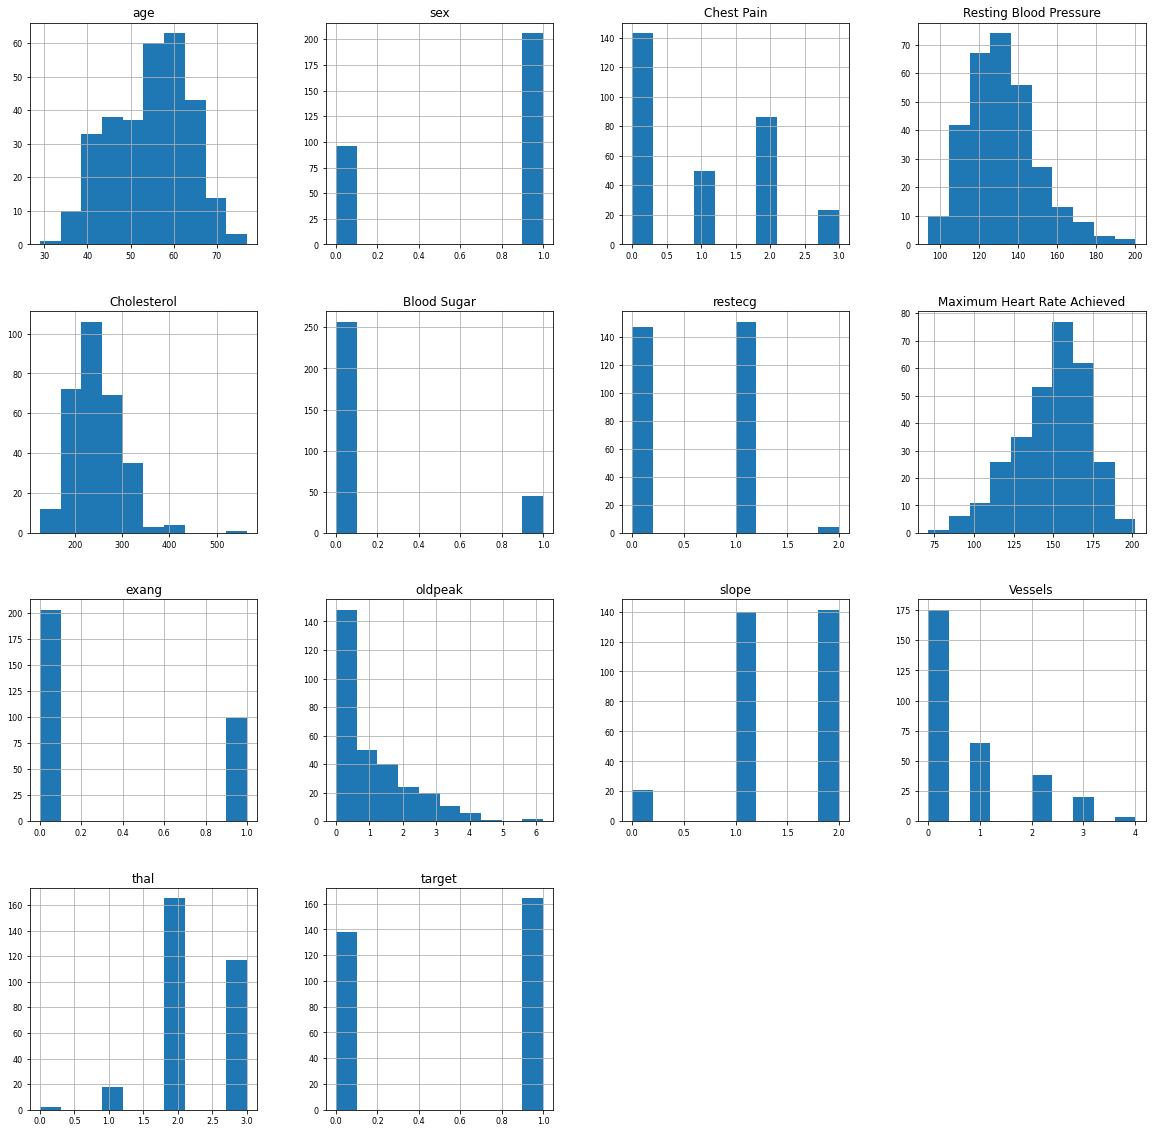

In [151]:
data_base.hist(figsize=(20, 20), xlabelsize=8, ylabelsize=8)

### Create a correlation heatmap

In [189]:
data_base.corr()

,age,sex,Chest Pain,Resting Blood Pressure,Cholesterol,Blood Sugar,restecg,Maximum Heart Rate Achieved,exang,oldpeak,slope,Vessels,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
Chest Pain,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
Resting Blood Pressure,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
Cholesterol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
Blood Sugar,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
Maximum Heart Rate Achieved,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

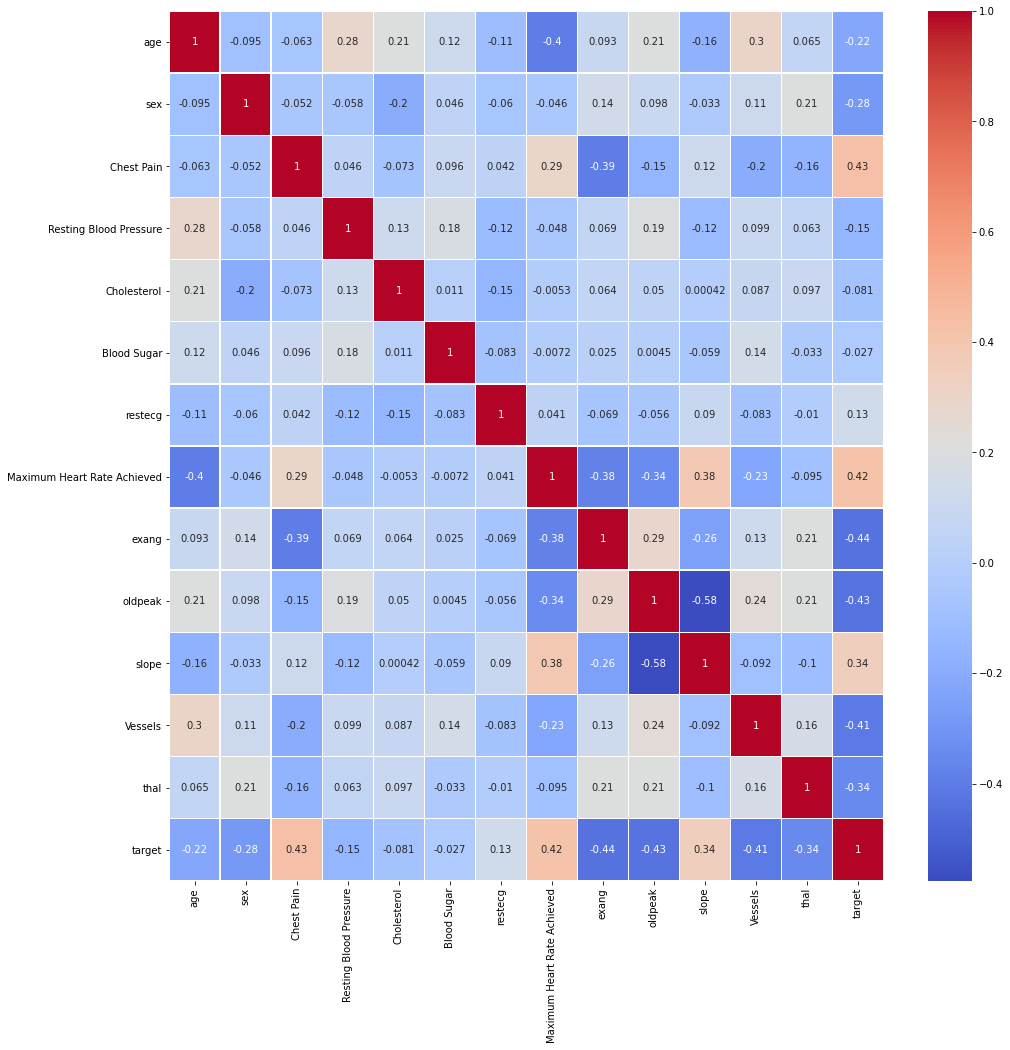

In [190]:
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(data_base.corr(),annot=True,cmap='coolwarm',linewidths=.5)

### count total number of male and female patient

In [191]:
data_base['Gender'].value_counts()

Male      206
Female     96
Name: Gender, dtype: int64

### helath condition by Gender

In [192]:
data_base.groupby(['Gender', 'Health Status'])['Gender'].count()

Gender  Health Status
Female  Healthy           24
        Sick              72
Male    Healthy          114
        Sick              92
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

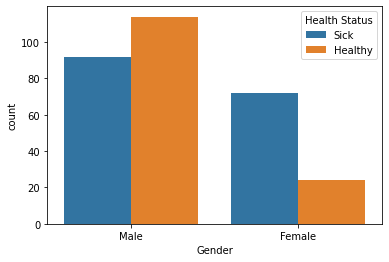

In [193]:
sns.countplot(data=data_base, x='Gender', hue='Health Status')

In [194]:
db['sex'].corr(db['target'])

-0.2809365755017666

### Helath status by chest pain

<AxesSubplot:xlabel='Chest Pain', ylabel='count'>

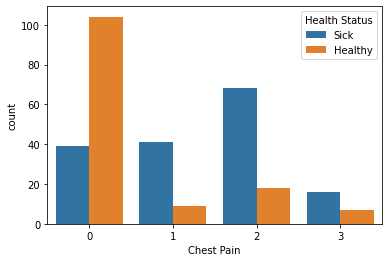

In [196]:
sns.countplot(data=data_base, x='Chest Pain', hue='Health Status')

In [197]:
data_base['Chest Pain'].corr(db['target'])

0.432079591566407

### Helath status by SLOPE

<AxesSubplot:xlabel='slope', ylabel='count'>

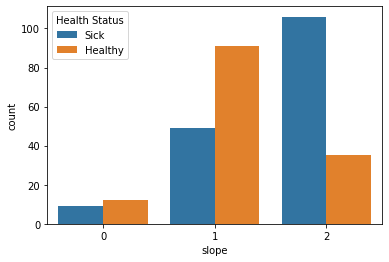

In [164]:
sns.countplot(data=data_base, x='slope', hue='Health Status')

In [165]:
data_base['slope'].corr(db['target'])

0.34393953248938663

<AxesSubplot:xlabel='Maximum Heart Rate Achieved', ylabel='Density'>

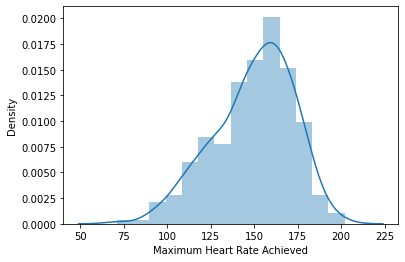

In [168]:
sns.distplot(data_base['Maximum Heart Rate Achieved'])

### Health status by maximum heart rate achive

<AxesSubplot:xlabel='Maximum Heart Rate Achieved', ylabel='count'>

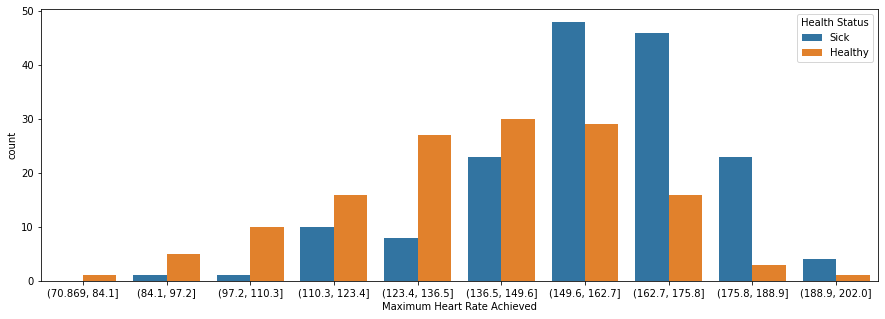

In [198]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data_base, x=pd.cut(data_base['Maximum Heart Rate Achieved'], 10), hue='Health Status')

In [199]:
data_base['Maximum Heart Rate Achieved'].corr(data_base['target'])

0.41995504366386954

### Health status by Thal 

<AxesSubplot:xlabel='thal', ylabel='count'>

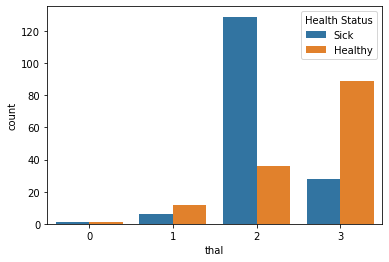

In [177]:
sns.countplot(data=data_base, x='thal', hue='Health Status')

In [178]:
data_base['thal'].corr(data_base['target'])

-0.3431007123895646

### Health status by Vessels

<AxesSubplot:xlabel='Vessels', ylabel='count'>

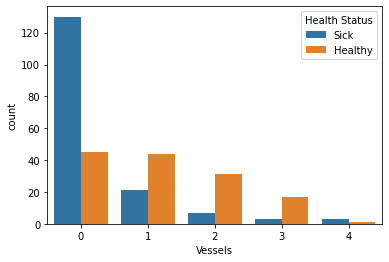

In [200]:
sns.countplot(data=data_base, x='Vessels', hue='Health Status')

In [201]:
data_base['Vessels'].corr(data_base['target'])

-0.4089919797569272

### Health status by oldpeak

<AxesSubplot:xlabel='oldpeak', ylabel='count'>

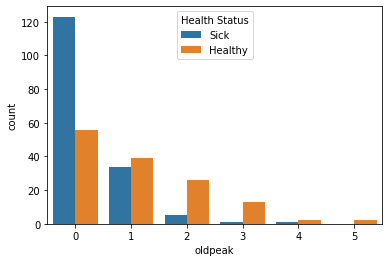

In [183]:
sns.countplot(data=data_base, x=pd.cut(data_base['oldpeak'], 6, labels=[0,1,2,3,4,5]), hue='Health Status')

In [184]:
data_base['oldpeak'].corr(data_base['target'])

-0.42914583288673774

### Health status by age

In [202]:
db['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [203]:
db['age'].mean()

54.366336633663366

<AxesSubplot:xlabel='age', ylabel='Density'>

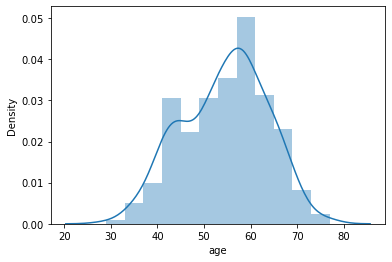

In [204]:
sns.distplot(db['age'])

<AxesSubplot:xlabel='age', ylabel='count'>

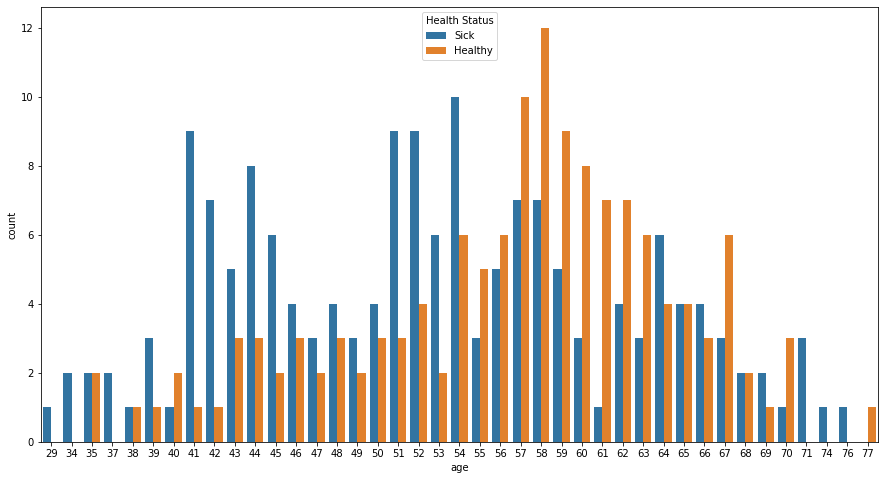

In [205]:
plt.figure(figsize=(15,8))
sns.countplot(data=data_base, x='age', hue='Health Status')

## Modeling

In [218]:
heart = pd.read_csv('heart.csv')

In [219]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [220]:
heart = heart.rename(columns={"cp": "chest_pain", "trestbps": "blood_pressure", "fbs": "blood_sugar", "ca": "vessels", "chol": "cholesterol"})

### Find duplicate values and drop it

In [221]:
heart[heart.duplicated(keep=False)]

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [222]:
heart = heart.drop_duplicates(keep='first')


In [223]:
heart

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### One-hot encode categorical features

In [224]:
heart = pd.get_dummies(heart, columns = ['sex', 'chest_pain', 'blood_sugar', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

### DATA PREPROCESING

In [225]:
x = heart.drop(['target'], axis = 1)
y = heart['target']

In [226]:
x

,age,blood_pressure,cholesterol,thalach,oldpeak,vessels,sex_1,chest_pain_1,chest_pain_2,chest_pain_3,blood_sugar_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,1,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.8,0,1,1,0,0,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,0,1,0,1,1,0,0,0,1
299,45,110,264,132,1.2,0,1,0,0,1,0,1,0,0,1,0,0,0,1
300,68,144,193,141,3.4,2,1,0,0,0,1,1,0,0,1,0,0,0,1
301,57,130,131,115,1.2,1,1,0,0,0,0,1,0,1,1,0,0,0,1


In [227]:
x.shape

(302, 19)

In [228]:
x.size

5738

In [229]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [230]:
y.shape

(302,)

In [231]:
y.size

302

### TRAIN DATASET
#### FEATURE SCALING

In [232]:

sc = StandardScaler()
x= sc.fit_transform(x)

In [233]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [234]:
x_train

array([[-1.3750206 , -0.66171188,  0.9386903 , ..., -0.25175441,
         0.91120965, -0.79525621],
       [ 1.50332164,  2.76015433,  0.53224708, ..., -0.25175441,
        -1.09744228,  1.25745639],
       [ 1.39261617, -0.37655636,  0.14515829, ..., -0.25175441,
        -1.09744228,  1.25745639],
       ...,
       [ 1.61402711,  1.61953226, -0.24193049, ..., -0.25175441,
         0.91120965, -0.79525621],
       [ 0.72838335,  0.13672357, -0.24193049, ..., -0.25175441,
         0.91120965, -0.79525621],
       [ 0.94979429,  0.47891019, -0.99675362, ..., -0.25175441,
         0.91120965, -0.79525621]])

In [235]:
x_test

array([[ 0.06415052,  0.02266137,  2.06124778, ..., -0.25175441,
        -1.09744228,  1.25745639],
       [ 1.06049976, -0.37655636,  1.20965245, ..., -0.25175441,
        -1.09744228,  1.25745639],
       [ 0.28556146,  1.04922123, -2.33220993, ..., -0.25175441,
        -1.09744228,  1.25745639],
       ...,
       [ 1.50332164,  0.70703461, -1.0354625 , ..., -0.25175441,
        -1.09744228,  1.25745639],
       [ 0.61767788,  0.47891019, -1.19029801, ..., -0.25175441,
         0.91120965, -0.79525621],
       [-1.15360966, -1.1179607 ,  0.84191811, ..., -0.25175441,
         0.91120965, -0.79525621]])

In [236]:
y_train

132    1
203    0
197    0
75     1
177    0
      ..
189    0
71     1
106    1
271    0
102    1
Name: target, Length: 241, dtype: int64

In [237]:
y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: target, Length: 61, dtype: int64

### DECISION TREE

In [238]:
df=DecisionTreeClassifier()
df.fit(x_train,y_train)
prediction=df.predict(x_test)
accuracy_df=accuracy_score(y_test,prediction)*100
print(f"Decision Tree Accuracy : {accuracy_df}")

Decision Tree Accuracy : 70.49180327868852


### Random Forest
#### Find the optimal number of decision trees for the Random Forest model (from a list of options)

[0.7704918032786885, 0.819672131147541, 0.819672131147541, 0.8032786885245902, 0.8032786885245902, 0.8032786885245902, 0.8032786885245902, 0.8032786885245902]


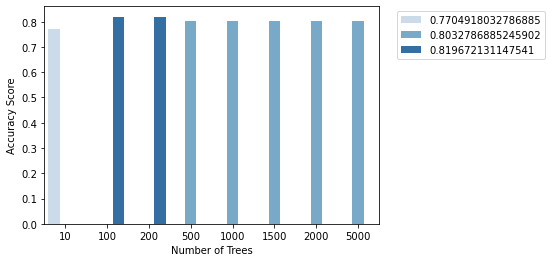

In [239]:
randomForest_scores = []
trees = [10, 100, 200, 500, 1000, 1500, 2000, 5000]
for x in trees:
    randomForest = RandomForestClassifier(n_estimators = x, random_state = 1, max_depth=1)
    randomForest.fit(x_train, y_train)
    randomForest_scores.append(randomForest.score(x_test, y_test))
print(randomForest_scores)

sns.barplot(trees, randomForest_scores, hue=randomForest_scores, palette='Blues')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy Score')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [240]:
randomForest = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_depth=1)

In [241]:
randomForest.fit(x_train, y_train);

In [242]:
randomForest.score(x_test, y_test)

random_forest_score = round(randomForest.score(x_test,y_test), 3) *100

print(f"Random Forest accuracy is {random_forest_score}%")

Random Forest accuracy is 80.30000000000001%


### K Nearest Neighbors

Max K Nearest Neighbors Accuracy is 86.89%
Best K is 13


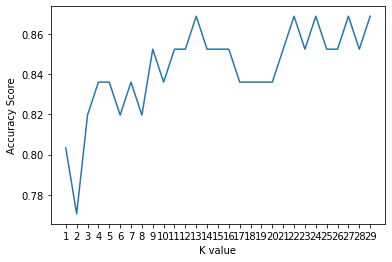

In [243]:
accuracyScores = []

for x in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = x)
    knn.fit(x_train, y_train)
    accuracyScores.append(knn.score(x_test, y_test))
    
    
sns.lineplot(range(1,30), accuracyScores)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Accuracy Score")


best_k = accuracyScores.index(max(accuracyScores)) + 1
knn_max_score = round((max(accuracyScores) * 100), 2) 

print(f"Max K Nearest Neighbors Accuracy is {knn_max_score}%")
print(f"Best K is {best_k}")

### Naive Bayes

In [244]:
nb = GaussianNB()
nb.fit(x_train, y_train)
nb.score(x_test,y_test)

nb_score = round(nb.score(x_test,y_test), 4) *100

print(f"Naive Bayes accuracy is {nb_score}%")

Naive Bayes accuracy is 86.89%


### SVM

In [245]:
svm = SVC(kernel='linear') # Linear Kernel
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)

In [246]:
svm_accuracy=svm.score(x_test,y_test)*100
print(f"SVM Accuracy:  {svm_accuracy}")

SVM Accuracy:  85.24590163934425


In [247]:
confusion_matrix(y_test,svm_pred)

array([[27,  2],
       [ 7, 25]], dtype=int64)

### Comparison with other Models

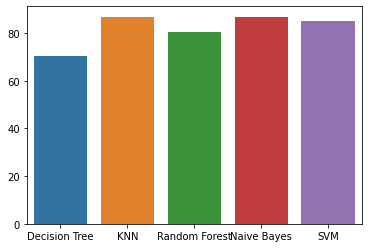

Decision Tree : 70.49180327868852 

KNN : 86.89 

Random Forest : 80.30000000000001 

Naive Bayes : 86.89 

SVM : 85.24590163934425 



In [248]:
algorithms=['Decision Tree','KNN','Random Forest', "Naive Bayes", "SVM"]
scores=[accuracy_df,knn_max_score,random_forest_score,nb_score,svm_accuracy ]
sns.barplot(algorithms,scores)
plt.show()
for i in range(0,len(scores)):
    print(f"{algorithms[i]} : {scores[i]} \n")

In [249]:
max_score = max(scores)
max_score_index = scores.index(max_score)
max_algo = algorithms[max_score_index]
print(f"From all Algorithms we get highest accuracy from {max_algo} : {max_score}")

From all Algorithms we get highest accuracy from KNN : 86.89


### PREDICT HEART DESEASE WITH CUSTOM DATA


In [250]:
catagory=['YOU DO NOT HAVE HEART DISEASE','YOU HAVE HEART DESEASE']

### ENTER YOUR USER DATA HERE:

In [251]:
heart


,age,blood_pressure,cholesterol,thalach,oldpeak,vessels,target,sex_1,chest_pain_1,chest_pain_2,chest_pain_3,blood_sugar_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.8,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.6,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
300,68,144,193,141,3.4,2,0,1,0,0,0,1,1,0,0,1,0,0,0,1
301,57,130,131,115,1.2,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1


In [252]:
custom_data_Knn=np.array([[57,120,354,163,0.6,0,0,0,0,0,0,1,0,1,0,1,0,1,0]])


In [253]:
custom_data_prediction_Knn=knn.predict(custom_data_Knn)
custom_data_prediction_Knn

array([0], dtype=int64)

In [254]:
int(custom_data_prediction_Knn)

0

In [255]:
print(catagory[int(custom_data_prediction_Knn)])

YOU DO NOT HAVE HEART DISEASE
